/var/folders/bk/zhdff0zs3yz8v31x8wdnftxm0000gn/T/ipykernel_39663/1879915931.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start="2020-01-01", end="2025-08-01")
[*********************100%***********************]  1 of 1 completed


Price            Close        High         Low        Open    Volume
Ticker             SPY         SPY         SPY         SPY       SPY
Date                                                                
2020-01-02  299.406464  299.424914  297.249878  298.180722  59151200
2020-01-03  297.139282  298.272884  295.931963  295.987258  77709700
2020-01-06  298.272858  298.355800  295.249920  295.369735  55653900
2020-01-07  297.434174  298.180683  296.982561  297.701423  40496400
2020-01-08  299.019409  300.245151  297.378928  297.627755  68296000
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1402 entries, 2020-01-02 to 2025-07-31
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   (Close, SPY)   1402 non-null   float64
 1   (High, SPY)    1402 non-null   float64
 2   (Low, SPY)     1402 non-null   float64
 3   (Open, SPY)    1402 non-null   float64
 4   (Volume, SPY)  1402 non-null   int64  
dtypes: float64(

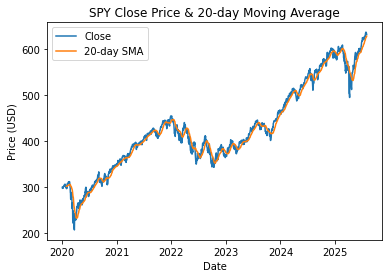

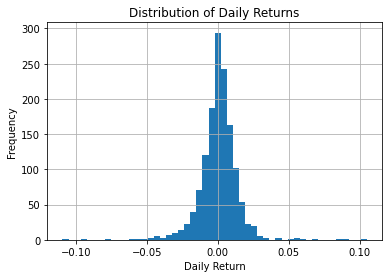

In [3]:
# 1. Install libraries (run once in terminal)
# pip install pandas yfinance matplotlib

import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# 2. Fetch SPY data via yfinance
ticker = "SPY"
df = yf.download(ticker, start="2020-01-01", end="2025-08-01")
# Alternatively: df = pd.read_csv("SPY.csv", parse_dates=["Date"], index_col="Date")

# 3. Inspect
print(df.head())
print(df.info())
print(df.describe())

# 4. Clean & transform
df = df.sort_index()  # ensure chronological order
df = df.ffill()       # forward-fill missing values
df["Daily Return"] = df["Close"].pct_change()
df["20d SMA"] = df["Close"].rolling(window=20).mean()
df["Cumulative Return"] = (1 + df["Daily Return"]).cumprod() - 1

# 5. Plot: Close vs. 20-day SMA
plt.figure()
plt.plot(df.index, df["Close"], label="Close")
plt.plot(df.index, df["20d SMA"], label="20-day SMA")
plt.title("SPY Close Price & 20-day Moving Average")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()

# 6. Plot: Daily Returns histogram
plt.figure()
df["Daily Return"].hist(bins=50)
plt.title("Distribution of Daily Returns")
plt.xlabel("Daily Return")
plt.ylabel("Frequency")
plt.show()

# 7. Export cleaned data
df.to_csv("SPY_cleaned.csv")
# or
df.to_excel(r"/Users/Ray/Sig_Work/SPY_cleaned.xlsx", sheet_name="SPY Data")

